In [ ]:
# Importing the dataset from Keras
from keras.datasets import fashion_mnist

# Loading the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# List with the Labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

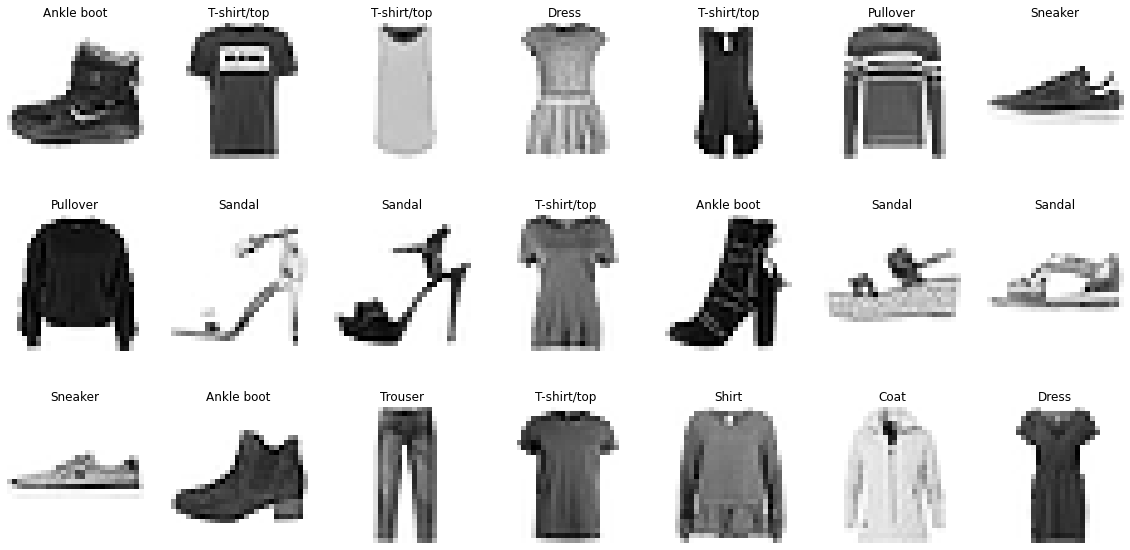

In [ ]:
# Checking some samples of the dataset

# Importing the needed library
import matplotlib.pyplot as plt

# Number of rows and columns of the image with the samples
num_rows = 3
num_columns = 7

# Setting a subplot space
fig, axs = plt.subplots(num_rows, num_columns, figsize=(20,10))

# Setting each subplot
aux = 0
for i in range(num_rows):
    for j in range(num_columns):
        # Loading the image and the label
        axs[i, j].imshow(x_train[aux], cmap='Greys')
        axs[i, j].set_title(labels[y_train[aux]])

        # Removing the axes and the frame
        axs[i, j].axis('off')
        
        aux += 1

In [ ]:
# Getting the shape of the data
print(f'Shape of: \n'
    f'- x_train: {x_train.shape} \n'
    f'- y_train: {y_train.shape} \n'
    f'- x_test: {x_test.shape} \n'
    f'- y_test: {y_test.shape} \n'
    )

Shape of: 
- x_train: (60000, 28, 28) 
- y_train: (60000,) 
- x_test: (10000, 28, 28) 
- y_test: (10000,) 



In [ ]:
# Reshape the data to meet TensorFlow parameters requirement (including the number of channels informations)
color_channels = 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], color_channels)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], color_channels)

input_shape_of_individual_samples = (x_train.shape[1], x_train.shape[2], color_channels)

# Normalizing the pixel values
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [ ]:
# Importing libraries used in the CNN (Convolutional Neural Network) model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Defining the layers
model = Sequential()

# Initial layer
filter_size = (3, 3)
number_filters = 28
model.add(Conv2D(number_filters, kernel_size=filter_size, 
                 input_shape = input_shape_of_individual_samples))

# Internal layers
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))

# Output layer
output_nodes = len(set(y_test))
model.add(Dense(output_nodes, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train, epochs=100, verbose=0)

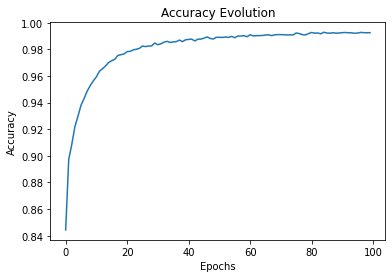

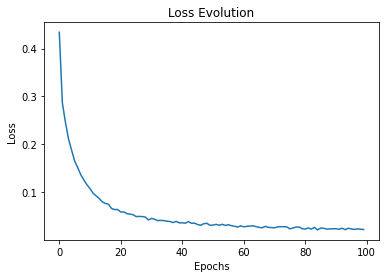

In [ ]:
# Showing the evolution of accuracy and loss during the epochs

# Accuracy
plt.plot(history.history['accuracy'])
plt.title('Accuracy Evolution')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.title('Loss Evolution')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
# Model evaluation with testing data
scores = model.evaluate(x_test, y_test, verbose=0)

print(f'Loss: {round(scores[0]*100, 2)}%')
print(f'Accuracy: {round(scores[1]*100, 2)}%')

Loss: 88.93%
Accuracy: 91.22%


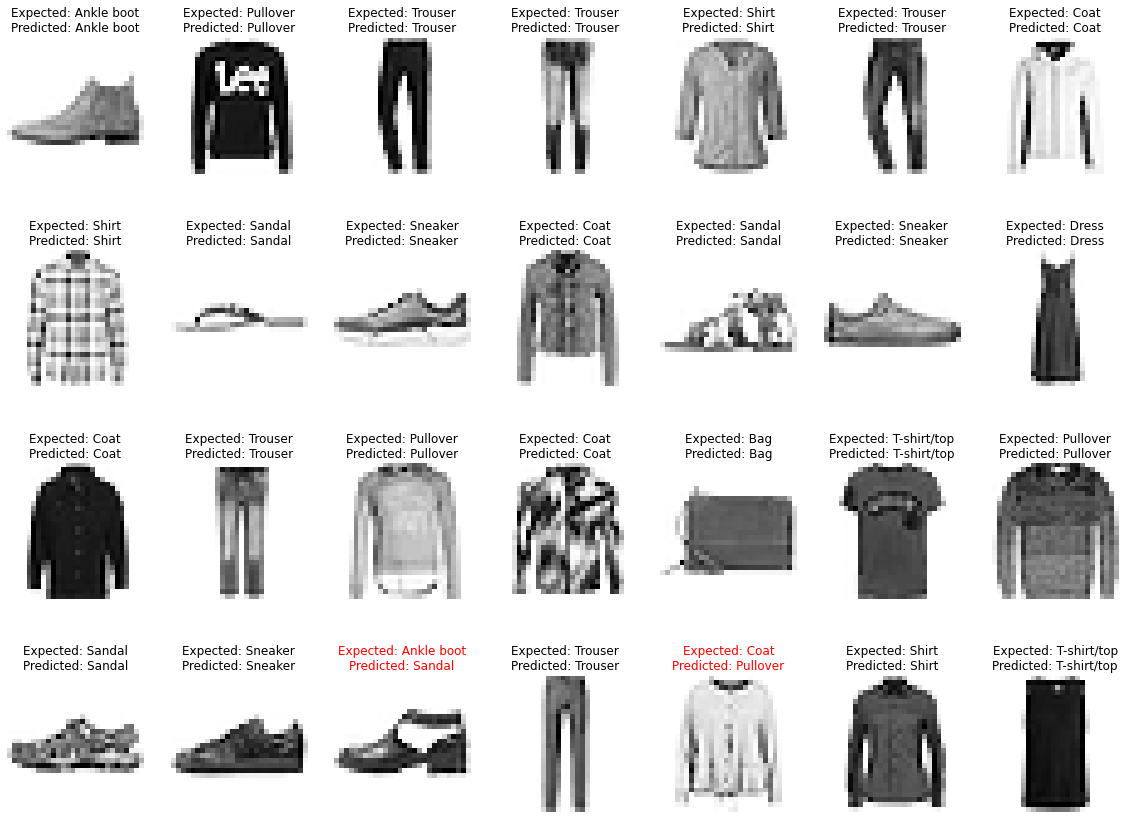

In [ ]:
# Checking some predictions

# Number of rows and columns of the image with the samples
num_rows = 4
num_columns = 7

# Setting a subplot space
fig, axs = plt.subplots(num_rows, num_columns, figsize=(20,15))

# Setting each subplot
aux = 0
for i in range(num_rows):
    for j in range(num_columns):

        pred = model.predict(x_test[aux].reshape(1,28,28,1))
        title = f'Expected: {labels[y_test[aux]]}\nPredicted: {labels[pred.argmax()]}'

        if y_test[aux] == pred.argmax():
            color = 'black'
        else:
            color = 'red'

        # Loading the image and the label
        axs[i, j].imshow(x_test[aux].reshape(28,28), cmap='Greys')
        axs[i, j].set_title(title, color=color)

        # Removing the axes and the frame
        axs[i, j].axis('off')
        
        aux += 1